In [1]:
pip install tensorflow opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
#importing required libraries
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt      
import random      


# Loading and prepareing the MNIST dataset

In [6]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [8]:
print("train_images shape", train_images.shape)
print("train_labels", train_labels.shape)
print("test_images shape", test_labels.shape)
print("test_labels shape", test_images.shape)

train_images shape (60000, 28, 28)
train_labels (60000,)
test_images shape (10000,)
test_labels shape (10000, 28, 28)


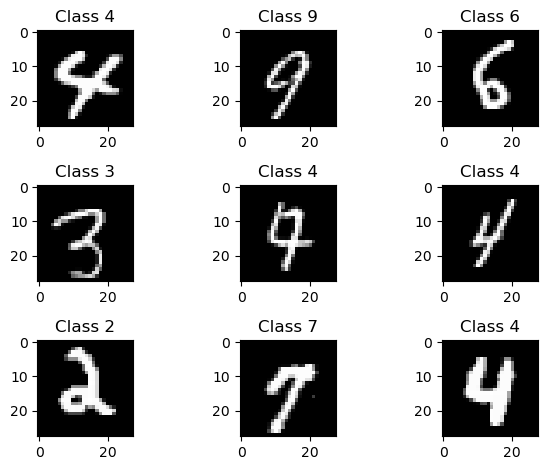

In [14]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(train_images))
    plt.imshow(train_images[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(train_labels[num]))
    
plt.tight_layout()

In [15]:
# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
# Reshape the images to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN model

In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\HOME\anaconda3\ANU\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and train the model

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.5674 - loss: 1.1982 - val_accuracy: 0.9147 - val_loss: 0.2832
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9174 - loss: 0.2610 - val_accuracy: 0.9498 - val_loss: 0.1665
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9505 - loss: 0.1590 - val_accuracy: 0.9598 - val_loss: 0.1280
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9656 - loss: 0.1096 - val_accuracy: 0.9705 - val_loss: 0.0949
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9729 - loss: 0.0869 - val_accuracy: 0.9764 - val_loss: 0.0736
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9771 - loss: 0.0756 - val_accuracy: 0.9775 - val_loss: 0.0673
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9790 - loss: 0.0636 - val_accuracy: 0.9797 - val_loss: 0.0624
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9822 -

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9985 - loss: 0.0041 - val_accuracy: 0.9857 - val_loss: 0.0722


# Evaluate the model 

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.9857 - loss: 0.0722

Test accuracy: 0.9857000112533569


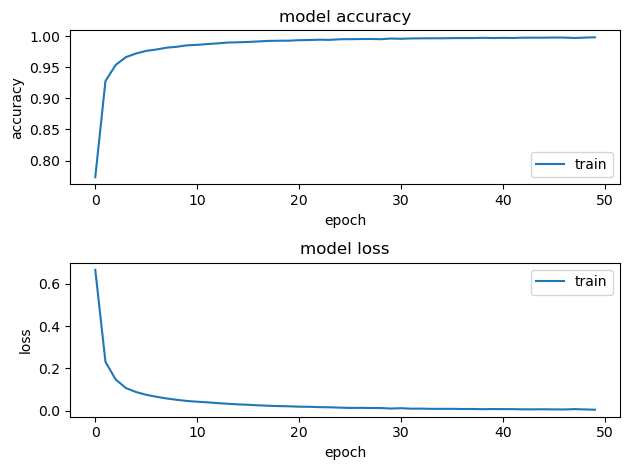

In [20]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# Save the model

In [21]:
model.save('mnist_cnn_model.h5')

# Load the model and make predictions

In [25]:
# Load the model
import tensorflow as tf
model = tf.keras.models.load_model('mnist_cnn_model.h5')

In [26]:
# Function to preprocess an image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize to 28x28 pixels
    img = cv2.resize(img, (28, 28))
    # Invert the colors (MNIST is white on black, OpenCV loads as black on white)
    img = cv2.bitwise_not(img)
    # Normalize and reshape
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

In [27]:
# Function to predict the digit in an image
def predict_digit(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    return np.argmax(prediction)

In [28]:
from PIL import Image

# Load the image
image_path = 'F:/Resumes and photos/22.png'
img = Image.open(image_path)

# Display the image using Pillow
img.show()

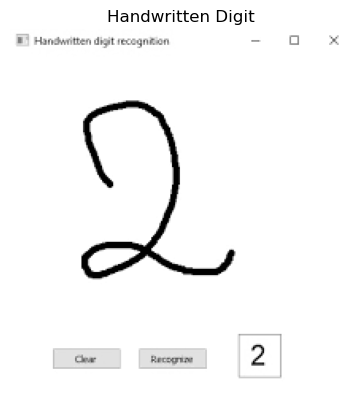

In [29]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = 'F:/Resumes and photos/22.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using Matplotlib
plt.imshow(img, cmap='gray')
plt.title('Handwritten Digit')
plt.axis('off') 
plt.show()

In [30]:
# Example usage
image_path = 'F:/Resumes and photos/22.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted digit: 2


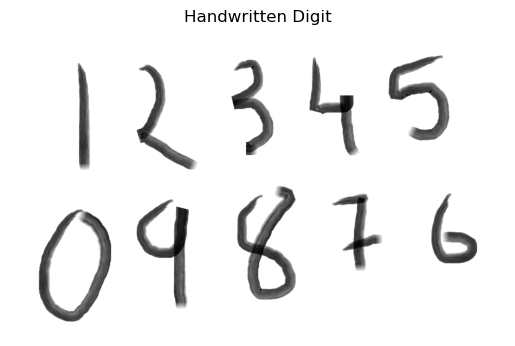

In [31]:
# Load the image
image_path = 'F:/Resumes and photos/all.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using Matplotlib
plt.imshow(img, cmap='gray')
plt.title('Handwritten Digit')
plt.axis('off') 
plt.show()

In [32]:
# Example usage
image_path = 'F:/Resumes and photos/all.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 2


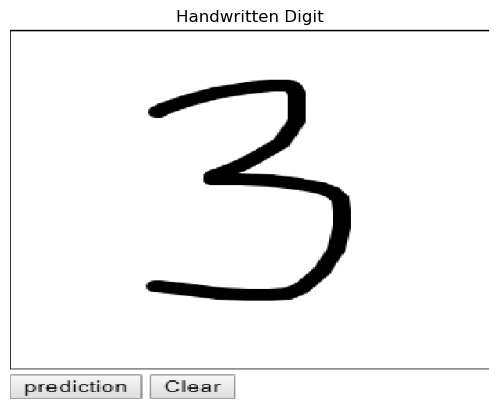

In [33]:
# Load the image
image_path = 'F:/Resumes and photos/3.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using Matplotlib
plt.imshow(img, cmap='gray')
plt.title('Handwritten Digit')
plt.axis('off') 
plt.show()

In [34]:
# Example usage
image_path = 'F:/Resumes and photos/3.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 3
